<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Case_study_03_Correlation_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study on Correlation and Regression**
A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
data = pd.read_csv("Add_sales_data_2018.csv")

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [ ]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [ ]:
#Feature dtae is not contributing to the model hence we can drop
data1 = data.drop(["Date"] , axis =1)

In [ ]:
#Renaming the columns
col = data1.columns
for i in col:
  new_name = i.replace(" ", "_")
  data1.rename(columns = {i:new_name} , inplace = True)

In [ ]:
data1.head()

,Add1(in_Thousands),Add2(in_Thousands),Add3(in_Thousands),Add4(in_Thousands),Add5(in_Thousands),Profit(in_Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


### **1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.**

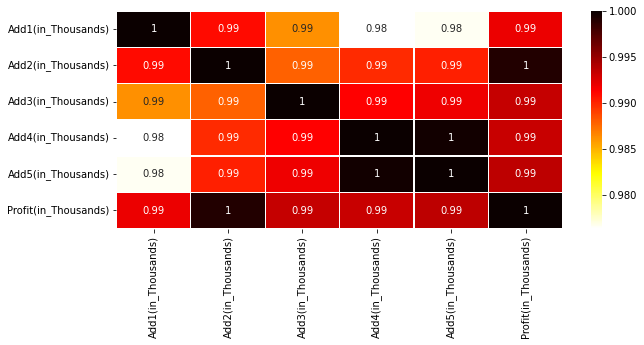

In [ ]:
corrmatrix = data1.corr()
plt.subplots(figsize =(10,4))
sns.heatmap(corrmatrix ,annot = True , linewidth = 0.2 ,cmap="hot_r")

 1)There is strong correlation between Add4 and Add5 , we can keep only one of them .

2) All the data ponts have strong positive correlation .

3)Profit and Add2 has have positive correlation .

# **2. Build a regression model to predict the profit from the given data and comment your findings on it.**

In [ ]:
x = data1.drop(columns = ["Add5(in_Thousands)" ,"Profit(in_Thousands)"], axis=1)
y = data1["Profit(in_Thousands)"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , random_state = 42 , test_size = 1/3)
from sklearn import linear_model
lr =linear_model.LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSe: " ,mean_squared_error(y_test , predictions))

MSe:  0.45258374504474863


 MSE is 0.4, It is low and model is performing good



### **3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**


In [ ]:
new_spending = pd.DataFrame({"Add1(in_Thousands)": [290] ,"Add2(in_Thousands)":[312],"Add3(in_Thousands)" :[309], "Add4(in_Thousands)" : [298]})
new_spending

,Add1(in_Thousands),Add2(in_Thousands),Add3(in_Thousands),Add4(in_Thousands)
0,290,312,309,298


In [ ]:
prediction_new = model.predict(new_spending)
print(" Profit predicted is:" , prediction_new)

Profit predicted is [5801.7097872]
